**Smart Citeis Group 8 Assignment 2**

## **Import important libraries and load the dataset**

In [1]:
import pandas as pd #data analysis library
import numpy as np  #to deal with arrays

#read the dataset
df = pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [33]:
#get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [3]:
#to show the dataset columns
df.columns

Index(['ID', 'Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
       'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber',
       'Ligitimacy'],
      dtype='object')

In [4]:
#counting values of Ligitimacy column
df['Ligitimacy'].value_counts()

1    12587
0     1897
Name: Ligitimacy, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


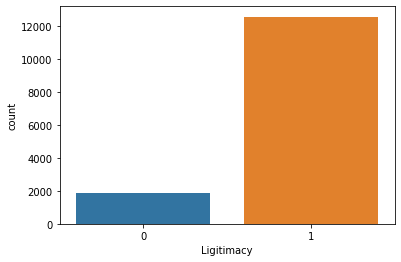

In [5]:
# as we can see we have imbalance dataset
import seaborn as sns
sns.countplot(df['Ligitimacy'])

In [6]:
import plotly.express as px #to create entire figures at once
fig = px.scatter_geo(df,
                    lat=df['Latitude'],
                    lon=df['Longitude'],
                    )
fig.show()

In [7]:
# define input and output
x= df.drop('Ligitimacy',axis = 1)
y= df['Ligitimacy'] 

In [8]:
# x=df.iloc[:,:12]
# y=df.iloc[:,-1]
# x

## **Split the dataset into train(80%) and test(20%) split** 

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## **Random Forest classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

#Create a Gaussian Classifier
rl=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rl.fit(x_train,y_train)

y_pred_rl=rl.predict(x_test)

In [11]:
#print the classification report after applying random forest classifier
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
from sklearn.metrics import classification_report 
print(classification_report(y_train,rl.predict(x_train)))
print(classification_report(y_test,y_pred_rl))
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1543
           1       1.00      1.00      1.00     10044

    accuracy                           1.00     11587
   macro avg       1.00      1.00      1.00     11587
weighted avg       1.00      1.00      1.00     11587

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       354
           1       1.00      1.00      1.00      2543

    accuracy                           1.00      2897
   macro avg       1.00      0.99      1.00      2897
weighted avg       1.00      1.00      1.00      2897



The accuracy of training is 100% and accuracy of testing is 99%

In [12]:
print(confusion_matrix(y_test, y_pred_rl))

[[ 348    6]
 [   0 2543]]


In [13]:
from sklearn.metrics import accuracy_score
X=accuracy_score(y_train, rl.predict(x_train))
#acuuracy for test
acc_RL= accuracy_score(y_test, y_pred_rl)
print(acc_RL)

0.9979288919571971


## **Apply Adaboost classification Model**

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

In [14]:
# Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)
#Train the model using the training sets y_pred=clf.predict(X_test)
ada.fit(x_train,y_train)

y_pred_ada=ada.predict(x_test)


In [15]:
print(classification_report(y_train,ada.predict(x_train)))
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1543
           1       0.98      0.99      0.98     10044

    accuracy                           0.97     11587
   macro avg       0.96      0.93      0.94     11587
weighted avg       0.97      0.97      0.97     11587

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       354
           1       0.98      0.99      0.99      2543

    accuracy                           0.97      2897
   macro avg       0.96      0.92      0.94      2897
weighted avg       0.97      0.97      0.97      2897



The training accuracy is 97% and testing accuracy is 97%

In [16]:
print(confusion_matrix(y_test, y_pred_ada))

[[ 299   55]
 [  19 2524]]


In [17]:
Y=accuracy_score(y_train, ada.predict(x_train))
#acuuracy for test
acc_ADA= accuracy_score(y_test, y_pred_ada)
print(acc_ADA)

0.9744563341387642


#**Apply GaussianNB classification Model**

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values. 

In [18]:
#to import GaussianNB classifier model
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(x_train,y_train)
#define y_pred to make the prediction
y_pred_nb = nb.predict(x_test)

In [19]:
print(classification_report(y_train,nb.predict(x_train)))
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.00      0.00      1543
           1       0.87      1.00      0.93     10044

    accuracy                           0.87     11587
   macro avg       0.73      0.50      0.47     11587
weighted avg       0.83      0.87      0.81     11587

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       354
           1       0.88      1.00      0.93      2543

    accuracy                           0.88      2897
   macro avg       0.44      0.50      0.47      2897
weighted avg       0.77      0.88      0.82      2897



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



The training accuracy is 87% and testing accuracy is 78%

In [20]:
print(confusion_matrix(y_test, y_pred_nb))


[[   0  354]
 [   0 2543]]


In [21]:
Z=accuracy_score(y_train, nb.predict(x_train))
#acuuracy for test
acc_NB= accuracy_score(y_test, y_pred_nb)
print(acc_NB)

0.8778046254746289


## **Apply Hard voting**

In [22]:
hard_votting = VotingClassifier(estimators=[('rl', rl), ('ada', ada), ('nb', nb)], voting='hard')
hard_votting1 = hard_votting.fit(x_train, y_train)
print('VotingClassifierModel Train Score: ' , hard_votting.score(x_train, y_train),"\n")

#Calculating Prediction
y_pred1 = hard_votting1.predict(x_test)
acc_votting_hard= accuracy_score(y_test, y_pred1)
print('VotingClassifierModel Test Score: ' , acc_votting_hard)
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix is : \n', CM)

VotingClassifierModel Train Score:  0.9815310261499957 

VotingClassifierModel Test Score:  0.9796341042457715
Confusion Matrix is : 
 [[ 295   59]
 [   0 2543]]


In [23]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       354
           1       0.98      1.00      0.99      2543

    accuracy                           0.98      2897
   macro avg       0.99      0.92      0.95      2897
weighted avg       0.98      0.98      0.98      2897



## **Apply soft voting**

In [24]:
wRF = X/(X+Y+Z)
wAdaboost = Y/(X+Y+Z)
wNB = Z/(X+Y+Z)
weights=[wRF,wAdaboost,wNB ]

ensemble = VotingClassifier(estimators=[('rl', rl), ('ada', ada), ('nb', nb)], voting='soft',weights=weights)
ensemble1 = ensemble.fit(x_train, y_train)

#Calculating Details
print('VotingClassifierModel Train Score is : ' , ensemble.score(x_train, y_train),"\n")

#Calculating Prediction
y_pred2 = ensemble1.predict(x_test)
acc_votting_soft= accuracy_score(y_test, y_pred2)
print('VotingClassifierModel Test Score is : ' , acc_votting_soft,"\n")

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix is : \n', CM)

VotingClassifierModel Train Score is :  0.9946491758004661 

VotingClassifierModel Test Score is :  0.9820503969623748 

Confusion Matrix is : 
 [[ 302   52]
 [   0 2543]]


In [25]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       354
           1       0.98      1.00      0.99      2543

    accuracy                           0.98      2897
   macro avg       0.99      0.93      0.96      2897
weighted avg       0.98      0.98      0.98      2897



## **Apply weighted sum aggregation**

In [26]:
agr_out = y_pred_rl *wRF + y_pred_ada *wAdaboost + y_pred_nb * wNB
agr_out

array([1., 1., 1., ..., 1., 1., 1.])

In [27]:
def hard_class(x):
  l = []
  for i in x:
    if i>0.5:
      l.append(1)
    else:
      l.append(0)
  return np.array(l)    

In [28]:
agr_out= hard_class(agr_out)
agg_acc = accuracy_score(y_test,agr_out)
agg_acc


0.979979288919572

## **Plot a barchart figure**

In [29]:
names= ['Random forest', 'AdaBoost' , 'Naive Bayes','Voting Classifiers' , 'ensemble Classifier weighted']
values = [acc_RL , acc_ADA , acc_NB  , acc_votting_hard , agg_acc]

No handles with labels found to put in legend.


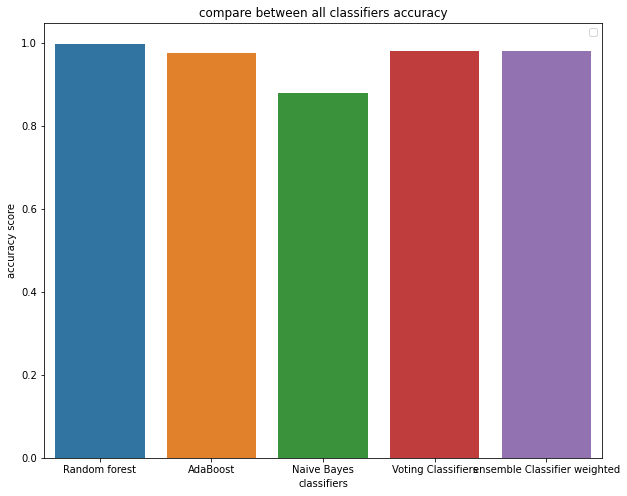

In [30]:
plt.figure(figsize=(10 , 8))
sns.barplot(x=names, y = values)
plt.title('compare between all classifiers accuracy')
plt.xlabel('classifiers')
plt.ylabel('accuracy score')
plt.legend()

As we can see, the Random Forest classifier model has the highest accuracy.

## **Compare between Random forest, AdaBoost and GaussianNB classifiers**

No handles with labels found to put in legend.


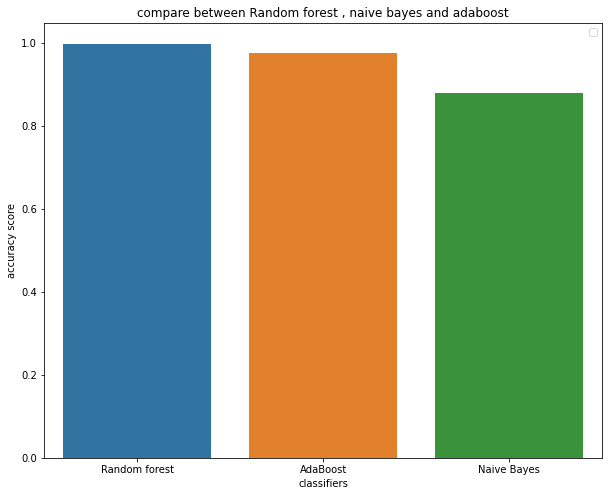

In [31]:
plt.figure(figsize=(10, 8))
sns.barplot(x=names[:3], y = values[:3])
plt.title('compare between Random forest , naive bayes and adaboost')
plt.xlabel('classifiers')
plt.ylabel('accuracy score')
plt.legend()

## **Comparing between voting and weighted ensemble**

No handles with labels found to put in legend.


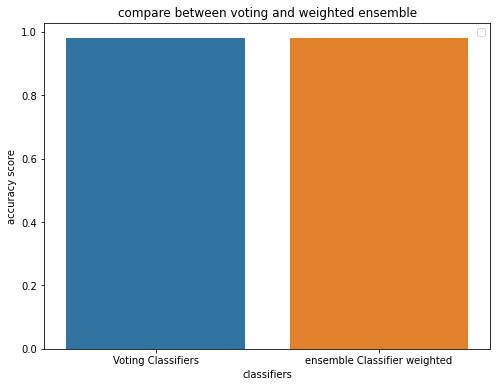

In [32]:
plt.figure(figsize=(8 , 6))
sns.barplot(x=names[3:], y = values[3:])
plt.title('compare between voting and weighted ensemble')
plt.xlabel('classifiers')
plt.ylabel('accuracy score')
plt.legend()

The weighted ensemble model has the same accuracy score like voting classifier